# Sentiment Analysis - LSTM

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
df = pd.read_csv('final_data.csv')

In [3]:
df.head()

,Unnamed: 0,Id,Title,User_id,review/helpfulness,review/score,review/time,review/summary,review/text,description,authors,publisher,publishedDate,categories,ratingsCount,compound,Sentiment
0,0,1882931173,Its Only Art If Its Well Hung!,AVCGYZL8FQQTD,7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...,NaN,['Julie Strain'],NaN,1996,['Comics & Graphic Novels'],2.0,0.9408,positive
1,1,0826414346,Dr. Seuss: American Icon,A30TK6U7DNS82R,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...,Philip Nel takes a fascinating look into the k...,['Philip Nel'],A&C Black,2005-01-01,['Biography & Autobiography'],2.0,0.9876,positive
2,2,0826414346,Dr. Seuss: American Icon,A3UH4UZ4RSVO82,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t...",Philip Nel takes a fascinating look into the k...,['Philip Nel'],A&C Black,2005-01-01,['Biography & Autobiography'],2.0,0.9932,positive
3,3,0826414346,Dr. Seuss: American Icon,A2MVUWT453QH61,7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",Philip Nel takes a fascinating look into the k...,['Philip Nel'],A&C Black,2005-01-01,['Biography & Autobiography'],2.0,0.9782,positive
4,4,0826414346,Dr. Seuss: American Icon,A22X4XUPKF66MR,3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...,Philip Nel takes a fascinating look into the k...,['Philip Nel'],A&C Black,2005-01-01,['Biography & Autobiography'],2.0,0.9604,positive


## Data Cleaning

- Filling NULL values in the 'review/text' column with a placeholder string.
- Filling NULL values in the 'Sentiment' column with the mode of the column. 
- Must ensure that each entry of the 'review/text' is a string, as each entry would be tokenized later so that it can be converted into a numerical form that can be processed by the LSTM.

In [4]:
df['review/text'].fillna("No review text", inplace=True)

mode = df['Sentiment'].mode()[0]
df['Sentiment'].fillna(mode, inplace = True)

df['review/text'] = df['review/text'].astype(str)

## Train-Test Split
#### Creating a Train-Test Split of 80:20. This means that 80% of the total samples are assigned to the training set, and the remaining 20% are assigned to the testing set. Stratified Sampling is used because the dataset is imbalanced.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df['review/text'], df['Sentiment'], random_state = 42, test_size = 0.2, stratify = df['Sentiment'])

## Label Encoding

#### Encoding the labels, i.e. 'Negative', 'Neutral', and 'Positive', are mapped to 0, 1, and 2 respectively.

In [6]:
label_encoder = LabelEncoder()

y_train_enc = label_encoder.fit_transform(y_train)
y_test_enc = label_encoder.transform(y_test)

## Tokenization and Padding

- #### Tokenizing each of the reviews present in the data to convert it into sequences that can be processed by the LSTM. 
- #### Ensuring that each of the sequences corresponding to each review is of equal length. Thus, padding all the sequences to the length of 20.

In [7]:
tokenizer = Tokenizer(num_words = 1000)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [8]:
X_train = pad_sequences(X_train, maxlen = 20)
X_test = pad_sequences(X_test, maxlen = 20)

## LSTM Neural Network
- The size of the dataset is very huge, therefore 3 LSTM layers have been chosen for the Neural Network. 
- Batch Normalization and Dropout layers have been incorporated so that the model avoids overfitting.
- Root Mean Squared Propagation (RMSProp) Optimizer used for training the Neural Net as this optimizer leads to faster convergence.

In [76]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, BatchNormalization

In [148]:
lstm = Sequential([
        Embedding(input_dim = len(tokenizer.word_index) + 1, output_dim=64, input_length=20, name = 'Embedding'),
        LSTM(64, return_sequences = True, name = 'LSTM1'),
        Dropout(0.3, name = 'Dropout1'),
        BatchNormalization(name = 'Batch_Normalization1'),
        LSTM(64, return_sequences = True, name = 'LSTM2'),
        BatchNormalization(name = 'Batch_Normalization2'),
        LSTM(64, name = 'LSTM3'),
        BatchNormalization(name = 'Batch_Normalization3'),
        Dense(128, name = 'Fully_Connected_Layer1', activation = 'relu'), 
        Dropout(0.5, name = 'Dropout2'),
        # output layer consists of 3 neurons, as there are 3 classes
        Dense(3, activation='softmax', name = 'Output')
    ], name = 'Long_Short_Term_Memory')

In [149]:
lstm.summary()

Model: "Long_Short_Term_Memory"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Embedding (Embedding)       (None, 20, 64)            54084864  
                                                                 
 LSTM1 (LSTM)                (None, 20, 64)            33024     
                                                                 
 Dropout1 (Dropout)          (None, 20, 64)            0         
                                                                 
 Batch_Normalization1 (Batc  (None, 20, 64)            256       
 hNormalization)                                                 
                                                                 
 LSTM2 (LSTM)                (None, 20, 64)            33024     
                                                                 
 Batch_Normalization2 (Batc  (None, 20, 64)            256       
 hNormalization)                            

In [150]:
lstm.compile(optimizer='RMSProp',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [151]:
from tensorflow.keras.utils import to_categorical
X_training, X_val, y_training, y_val = train_test_split(X_train, y_train_enc, test_size=0.2, random_state=42, stratify = y_train_enc)
y_training = to_categorical(y_training)
y_val = to_categorical(y_val)

## Training the LSTM Neural Net
- The LSTM has been trained on two epochs. 
- batch_size is set to 2048 for faster training of the LSTM Neural Net
- The Neural Net achieves an accuracy of 84.39% on the validation set. This is a good accuracy, given the enormous size of the dataset. 

In [152]:
history = lstm.fit(X_training, y_training,
                    epochs = 2,
                    batch_size = 2048,
                    validation_data = (X_val, y_val), 
                    verbose = 1)

Epoch 1/2
762/762 [==============================] - 551s 715ms/step - loss: 0.4491 - accuracy: 0.8354 - val_loss: 0.4209 - val_accuracy: 0.8426
Epoch 2/2
762/762 [==============================] - 555s 729ms/step - loss: 0.4194 - accuracy: 0.8431 - val_loss: 0.4138 - val_accuracy: 0.8439


## Performance on Test Set
#### Observations:
- The model achieves an accuracy of 84.39% on the Test Set. This is a good accuracy because the dataset is very large. 
- As per the classification report, the model achieves high precision, recall and f1-scores for the majority class, i.e. 'Positive' sentiment.
- The model achieves very poor recall and f1-scores for the sentiment class 'Negative'.
- The model achieves bad precision, recall and f1-scores for the sentiment class 'Neutral', which is the minority class.
- This is simply because the dataset is highly imbalanced, over 83% of the samples belong to the majority class. Alongside, the dataset is also very huge, therefore the precision, recall and f1-scores corresponding to the two minority classes, do not accurately demonstrate the model's ability t distinguish between the different classes.
- Thus, we further investigate the PR curves and the ROC Curves!

In [153]:
predictions = lstm.predict(X_test)

15238/15238 [==============================] - 162s 11ms/step


In [156]:
import numpy as np
predicted_classes = np.argmax(predictions, axis = 1)

In [158]:
from sklearn.metrics import accuracy_score, classification_report

In [161]:
accuracy = accuracy_score(y_test_enc, predicted_classes)
report = classification_report(y_test_enc, predicted_classes)

In [162]:
print('Accuracy: ', accuracy)
print('Classification Report: ')
print(report)

Accuracy:  0.8435205617673358
Classification Report: 
              precision    recall  f1-score   support

           0       0.68      0.09      0.16     71182
           1       0.49      0.22      0.30      9709
           2       0.85      0.99      0.91    406713

    accuracy                           0.84    487604
   macro avg       0.67      0.43      0.46    487604
weighted avg       0.82      0.84      0.79    487604



## Confusion Matrix

In [164]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [165]:
cm = confusion_matrix(y_test_enc, predicted_classes)

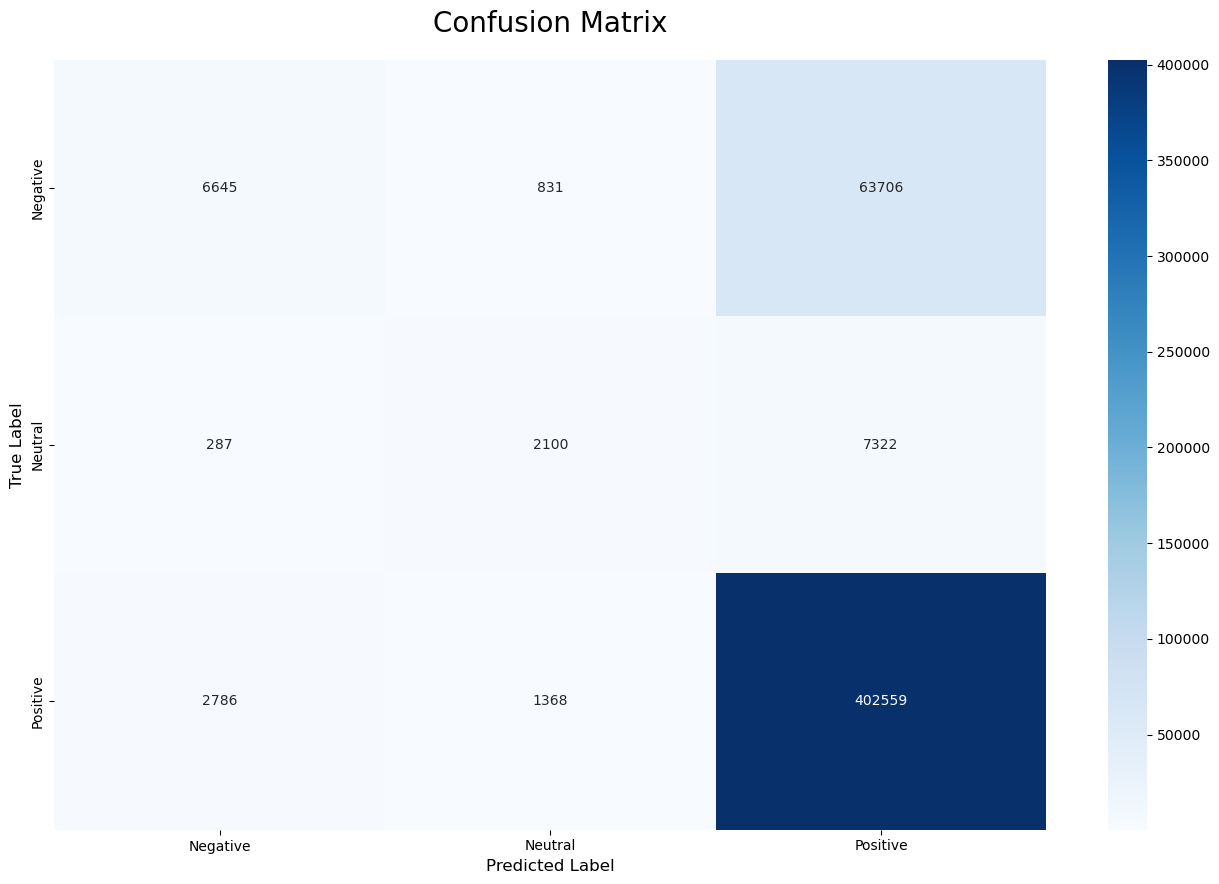

In [175]:
plt.figure(figsize=(16,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])  
plt.title('Confusion Matrix', pad = 20, fontsize = 20)
plt.ylabel('True Label', fontsize = 12)
plt.xlabel('Predicted Label', fontsize = 12)
plt.show()

## Precision-Recall Curve

- As there are three classes, using a One vs Rest Approach for the Precision-Recall curves
- The model achieves a high AUC for the majority class ('Positive'). This indicates that the model is very effective at identifying true positives for this class while minimizing the false positives. Essentially, as the model tries to capture more positive samples (thus increasing recall), it does so without making many incorrect positive predictions (false positives) (maintaining high precision).
- The model achieves a poor AUC for the minority classes ('Neutral', and 'Negative'). This suggests that the model struggles to maintain high precision with the increase in recall. This essentially means that in trying to capture more of the actual positives for the minority classes, the models ends up incorrectly labelling more negatives as positives, thus lowering precision. 
- Since the dataset is huge and imbalanced, a low PR AUC fo the minority classes indicates that while the model can detect minority classes, it either does so with many False Positives (low precision) or it fails to detect a significant number of actual positive instances (low recall). This ultimately suggests that the model's ability to correctly label minority class instances as positive without incorrectly labeling many non-minority class instances is limited. 

In [200]:
from sklearn.metrics import precision_recall_curve, auc
from sklearn.preprocessing import label_binarize

In [201]:
y_test_binarized = label_binarize(y_test_enc, classes = [0, 1, 2])

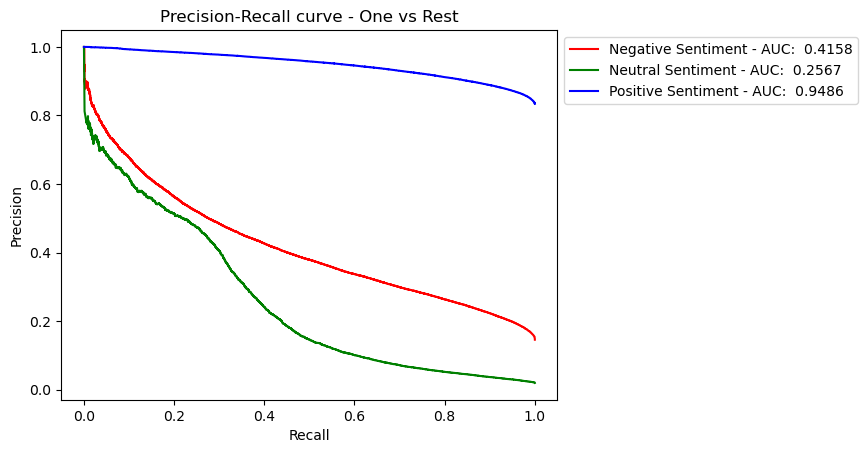

In [203]:
# 'predictions' contains the prediction probability corresponding to each class for every point in the 
# test set

classes = ['Negative', 'Neutral', 'Positive']
colors = ['red', 'green', 'blue']
area = {}
for i, color in enumerate(colors):
    precision, recall, _ = precision_recall_curve(y_test_binarized[:,i], predictions[:, i])
    area[i] = auc(recall, precision)
    plt.plot(recall, precision, color = color, label = f'{classes[i]} Sentiment - AUC: {area[i]: 0.4f}')
    
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve - One vs Rest')
plt.legend(loc="upper left", bbox_to_anchor = (1,1))
plt.show()

## ROC Curve
- Used a One vs Rest Approach for the ROC Curves, as there are three classes. 
- The LSTM model achieves high AUC on both the minority and the majority classes. However, the model achieves highest AUC on the minority class 'Neutral' (which has the fewest instances). 
- A high ROC for the minority classes indicates that the model is effective at discriminating these classes from others across various threshold settings. This means that the model can separate the positive minority class instances from the negative ones (all other classes) with high confidence. 
- The ROC curve is sensitive for the True Positive Rate (TPR) and the False Positive Rate (FPR). This implies that the model manages these rates well for the minority classes.
- This observation is pivotal because the dataset is huge and imbalanced, thus implying that even though the minority class has fewer instances, the model identifies them reliably without being overwhelmed by the majority class.

In [195]:
from sklearn.metrics import roc_curve, roc_auc_score

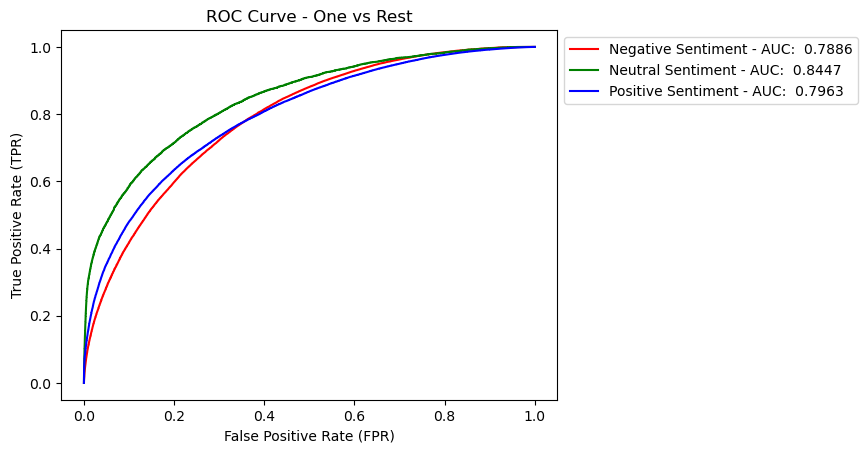

In [199]:
# 'predictions' contains the prediction probability corresponding to each class for every point in the 
# test set

classes = ['Negative', 'Neutral', 'Positive']
colors = ['red', 'green', 'blue']
roc_auc = {}
for i, color in enumerate(colors):
    fpr, tpr, _ = roc_curve(y_test_binarized[:,i], predictions[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:,i], predictions[:, i])
    plt.plot(fpr, tpr, color = color, label = f'{classes[i]} Sentiment - AUC: {roc_auc[i]: .4f}')
    
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - One vs Rest')
plt.legend(loc="upper left", bbox_to_anchor = (1,1))
plt.show()

## Conclusion: 
#### The LSTM model achieves a high ROC AUC, but a low PR AUC for the minority classes. This suggests that the LSTM model is sensitive enough to detect the minority class instances (as indicated by high ROC AUC) but not specific enough when it comes to precisely labeling those detections without false positives (as indicated by low PR AUC). Since the LSTM model is trained on a huge and imbalanced dataset, the rarity of the minority class leads to less training data, therefore the LSTM model learns to recognize instances of the minority class but with less confidence in precision. The low PR AUC indicates that while the model can distinguish minority classes from others (as implied by high ROC AUC for minority classes), it struggles with precision and recall balance while doing so. The LSTM model's challenge with maintaining this balanced is simply because the dataset is very huge and imbalanced.